In [1]:
# thư viện
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [2]:
# lấy dữ liệu
data = pd.read_csv('drug200.csv')
data.tail(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
190,58,M,HIGH,HIGH,18.991,DrugY
191,23,M,HIGH,HIGH,8.011,drugA
192,72,M,LOW,HIGH,16.310,DrugY
193,72,M,LOW,HIGH,6.769,drugC
194,46,F,HIGH,HIGH,34.686,DrugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [3]:
X = data.drop(['Drug'], axis = 1)
y = data['Drug']
print(X)

     Age Sex      BP Cholesterol  Na_to_K
0     23   F    HIGH        HIGH   25.355
1     47   M     LOW        HIGH   13.093
2     47   M     LOW        HIGH   10.114
3     28   F  NORMAL        HIGH    7.798
4     61   F     LOW        HIGH   18.043
..   ...  ..     ...         ...      ...
195   56   F     LOW        HIGH   11.567
196   16   M     LOW        HIGH   12.006
197   52   M  NORMAL        HIGH    9.894
198   23   M  NORMAL      NORMAL   14.020
199   40   F     LOW      NORMAL   11.349

[200 rows x 5 columns]


In [4]:
print(X['Sex'].value_counts())
print(X['BP'].value_counts())
print(X['Cholesterol'].value_counts())
print(y.value_counts())

Sex
M    104
F     96
Name: count, dtype: int64
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [5]:
X = pd.get_dummies(X, dtype = 'int') # one hot encoding
y = y.map({"drugA":  1, "drugB": 2, "drugC": 3, "drugX": 4, "DrugY": 5})
y

0      5
1      3
2      3
3      4
4      5
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64

1.0315298303593092


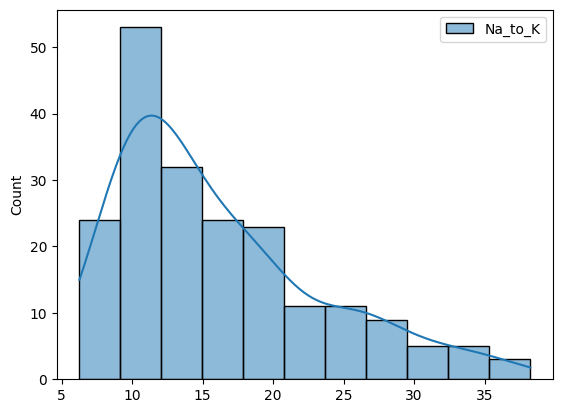

In [6]:
# xem phân phối của cột Age và Na_to_K
import seaborn as sns
from scipy.stats import skew
sns.histplot(X[['Na_to_K']], kde = True)
print(skew(X['Na_to_K'])) # --> Skew > 0 : phân phối lệch phải

In [7]:
# tạo tập train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train)
print(y_train)
print(len(X_train), len(y_train), len(X_test), len(y_test))

     Age  Na_to_K  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
131   52   32.922      0      1        0       1          0                 0   
96    58   38.247      1      0        0       1          0                 1   
181   59   13.884      1      0        0       0          1                 1   
19    32   25.974      1      0        1       0          0                 0   
153   72   14.642      1      0        0       1          0                 0   
..   ...      ...    ...    ...      ...     ...        ...               ...   
67    17   10.832      0      1        0       0          1                 0   
192   72   16.310      0      1        0       1          0                 1   
117   40   10.103      1      0        0       0          1                 1   
47    68   10.291      0      1        0       1          0                 1   
172   39   17.225      1      0        0       0          1                 0   

     Cholesterol_NORMAL  
1

In [8]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [9]:
y_pred = gaussian.predict(X_test)
y_pred_proba = gaussian.predict_proba(X_test)
print(y_pred)
print(y_pred_proba[:5]) # xem 5 dòng đầu
print(len(y_pred_proba))

[3 4 3 5 4 4 4 4 3 4 1 5 1 4 2 3 5 5 4 1 1 4 4 4 5 4 4 5 5 4 4 3 1 4 5 2 4
 3 1 4 1 1 5 4 5 4 4 5 1 2 5 2 5 5 3 5 4 4 4 2]
[[0.00000000e+00 0.00000000e+00 1.00000000e+00 3.02753267e-13
  1.05458699e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.99868617e-01
  1.31382997e-04]
 [0.00000000e+00 0.00000000e+00 9.99999999e-01 3.79425438e-11
  1.12784178e-09]
 [5.44570309e-20 6.51113947e-35 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.64228623e-01
  2.35771377e-01]]
60


In [10]:
mapp =  {1: "drugA", 2: "drugB", 3: "drugC", 4: "drugX", 5: "DrugY"}
y_pred_trans = [mapp[i] for i in y_pred]
y_test_trans = [mapp[i] for i in y_test]
list(zip(y_pred_trans, y_test_trans))

[('drugC', 'drugC'),
 ('drugX', 'drugX'),
 ('drugC', 'DrugY'),
 ('DrugY', 'DrugY'),
 ('drugX', 'DrugY'),
 ('drugX', 'drugX'),
 ('drugX', 'drugX'),
 ('drugX', 'drugX'),
 ('drugC', 'DrugY'),
 ('drugX', 'drugX'),
 ('drugA', 'drugA'),
 ('DrugY', 'DrugY'),
 ('drugA', 'DrugY'),
 ('drugX', 'DrugY'),
 ('drugB', 'drugB'),
 ('drugC', 'drugC'),
 ('DrugY', 'DrugY'),
 ('DrugY', 'DrugY'),
 ('drugX', 'drugX'),
 ('drugA', 'DrugY'),
 ('drugA', 'DrugY'),
 ('drugX', 'drugX'),
 ('drugX', 'drugX'),
 ('drugX', 'drugX'),
 ('DrugY', 'DrugY'),
 ('drugX', 'DrugY'),
 ('drugX', 'DrugY'),
 ('DrugY', 'DrugY'),
 ('DrugY', 'DrugY'),
 ('drugX', 'drugX'),
 ('drugX', 'drugX'),
 ('drugC', 'drugC'),
 ('drugA', 'drugA'),
 ('drugX', 'drugX'),
 ('DrugY', 'DrugY'),
 ('drugB', 'DrugY'),
 ('drugX', 'drugX'),
 ('drugC', 'DrugY'),
 ('drugA', 'drugA'),
 ('drugX', 'drugX'),
 ('drugA', 'DrugY'),
 ('drugA', 'drugA'),
 ('DrugY', 'DrugY'),
 ('drugX', 'drugX'),
 ('DrugY', 'DrugY'),
 ('drugX', 'drugX'),
 ('drugX', 'DrugY'),
 ('DrugY', 'D

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      1.00      0.71         5
           2       0.60      1.00      0.75         3
           3       0.57      1.00      0.73         4
           4       0.75      1.00      0.86        18
           5       1.00      0.50      0.67        30

    accuracy                           0.75        60
   macro avg       0.70      0.90      0.74        60
weighted avg       0.84      0.75      0.74        60



- Thuật toán Naive Bayes dùng phân phối Gaussian ***CÓ THỂ*** hoạt động tốt hơn nếu ta biến đổi các cột có phân phối ***LỆCH PHẢI*** về gần phân phối chuẩn (dùng log, StandardScaler, ...). Đó là lý do ta nên có thêm bước xem dạng phân phối của đặc trưng.
-  Hãy thử áp dụng cho bài toán này để xem kết quả hoạt động của thuật toán có tốt hơn không.
-  Khuyến khích các bạn nên biết thêm về các phương pháp MinMaxScaler, StandardScaler, RobustScaler và sự khác biệt giữa chúng 😊😊😘